<a href="https://colab.research.google.com/github/Youngstat/MLTSA_YJiang/blob/master/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

# data ingestion

read in the first 10 files, in alphabetical order, in the https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs Stock dataset. Follow [this notebook](https://github.com/fedhere/MLTSA_FBianco/blob/master/CodeExamples/Kaggledata_load.ipynb) for guidance on how to programmatically access the Kaggle data. The data must be accessed from a google colab notebook programmatically using the Kaggle API and software. 
Note: to sort file alphabecially you can use the glob package and the sort function of numpy:

The files need to be in a single dataframe with "Date" as index. 

Read in each file (e.g. with ```pd.read_csv()``` into a dataframe. Merge each df recursively with the precious one using the ```merge()``` method of dataframes, mergin on "Date". Use only the "Close" column (the price at closing). Rename  each column by the name of the file (e.g. the "Close" column of the "a.us.txt" file should be named "a.us"


There is a partial solution available in the slides (very last slide in [MLTSA2](https://slides.com/federicabianco/mltsa2/live?context=editing#/14/1))



In [0]:
from google.colab import drive

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!pwd

/content


In [0]:
cd gdrive/My\ Drive/

/content/gdrive/My Drive


In [0]:
ls kaggle.json

kaggle.json


In [0]:
!chmod 600 kaggle.json

In [0]:
import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [0]:
os.environ

environ({'ENV': '/root/.bashrc', 'GCS_READ_CACHE_BLOCK_SIZE_MB': '16', 'CLOUDSDK_CONFIG': '/content/.config', 'CUDA_VERSION': '10.1.243', 'PATH': '/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin', 'HOME': '/root', 'LD_LIBRARY_PATH': '/usr/local/nvidia/lib:/usr/local/nvidia/lib64', 'LANG': 'en_US.UTF-8', 'SHELL': '/bin/bash', 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs', 'CUDA_PKG_VERSION': '10-1=10.1.243-1', 'SHLVL': '1', 'GCE_METADATA_TIMEOUT': '0', 'NCCL_VERSION': '2.4.8', 'NVIDIA_VISIBLE_DEVICES': 'all', 'TF_FORCE_GPU_ALLOW_GROWTH': 'true', 'DEBIAN_FRONTEND': 'noninteractive', 'CUDNN_VERSION': '7.6.5.32', 'LAST_FORCED_REBUILD': '20200204', 'JPY_PARENT_PID': '18', 'PYTHONPATH': '/env/python', 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""]}', 'NO_GCE_CHECK': 'True', 'GLIBCXX_FORCE_NEW':

In [0]:
!kaggle datasets

usage: kaggle datasets [-h]
                       {list,files,download,create,version,init,metadata,status}
                       ...
kaggle datasets: error: too few arguments


In [0]:
!kaggle datasets list -s stock

ref                                                       title                                           size  lastUpdated          downloadCount  
--------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  
borismarjanovic/price-volume-data-for-all-us-stocks-etfs  Huge Stock Market Dataset                      492MB  2017-11-16 14:53:29          49660  
dgawlik/nyse                                              New York Stock Exchange                         31MB  2017-02-22 10:18:25          37663  
camnugent/sandp500                                        S&P 500 stock data                              19MB  2018-02-10 03:15:53          24706  
aaron7sun/stocknews                                       Daily News for Stock Market Prediction           6MB  2019-11-13 18:22:52          28310  
rpaguirre/tesla-stock-price                               Tesla Stock Price                               

In [0]:
!kaggle datasets download borismarjanovic/price-volume-data-for-all-us-stocks-etfs

price-volume-data-for-all-us-stocks-etfs.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!ls

In [0]:
!pwd


/content/gdrive/My Drive


In [0]:
!unzip price-volume-data-for-all-us-stocks-etfs.zip

Streaming output truncated to the last 5000 lines.
  inflating: Stocks/erh.us.txt       
  inflating: Stocks/eri.us.txt       
  inflating: Stocks/eric.us.txt      
  inflating: Stocks/erie.us.txt      
  inflating: Stocks/erii.us.txt      
  inflating: Stocks/erj.us.txt       
  inflating: Stocks/erm.us.txt       
  inflating: Stocks/ern.us.txt       
  inflating: Stocks/eros.us.txt      
  inflating: Stocks/eryp.us.txt      
  inflating: Stocks/es.us.txt        
  inflating: Stocks/esba.us.txt      
  inflating: Stocks/esbk.us.txt      
  inflating: Stocks/esca.us.txt      
  inflating: Stocks/esdi.us.txt      
  inflating: Stocks/esdiw.us.txt     
  inflating: Stocks/ese.us.txt       
  inflating: Stocks/esea.us.txt      
  inflating: Stocks/eses.us.txt      
  inflating: Stocks/esg.us.txt       
  inflating: Stocks/esgd.us.txt      
  inflating: Stocks/esge.us.txt      
  inflating: Stocks/esgf.us.txt      
  inflating: Stocks/esgg.us.txt      
  inflating: Stocks/esgl.us.txt      

In [0]:
!pwd

/content/gdrive/My Drive


In [0]:
cd Stocks 

/content/gdrive/My Drive/Stocks


In [0]:
import glob
alltss = []

allfiles = np.sort(np.array(glob.glob("*.txt")))[:10]
tss = pd.read_csv(allfiles[0])[["Date", 
                                "Close"]].rename({
  "Close":allfiles[0].replace(".txt","")}, axis=1)
for f in allfiles[1:]:
    print(f)
    name = f.replace(".txt","")
    
    tss = tss.merge(pd.read_csv(f)[["Date", "Close"]].rename(
      {"Close":name}, axis=1), on="Date")
tss.set_index("Date", inplace=True)


aa.us.txt
aaap.us.txt
aaba.us.txt
aac.us.txt
aal.us.txt
aamc.us.txt
aame.us.txt
aan.us.txt
aaoi.us.txt


In [0]:
print ("shape of the dataset:", tss.shape)

shape of the dataset: (447, 10)


#  data inspection

plot each time series (ts)

In [0]:
tss

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
Date,,,,,,,,,,
2015-11-11,36.901,17.779,24.50,33.38,22.56,43.524,20.75,4.7960,24.649,16.76
2015-11-12,36.734,17.206,25.00,33.23,22.50,43.044,19.17,4.8951,24.182,16.11
2015-11-13,36.030,17.581,25.26,32.19,22.68,42.603,17.50,4.6672,23.795,16.60
2015-11-16,36.577,18.242,25.02,32.94,22.58,41.994,15.58,4.8455,23.923,16.93
2015-11-17,37.607,18.197,24.62,32.86,22.52,41.473,12.59,4.9150,23.418,16.68
...,...,...,...,...,...,...,...,...,...,...
2017-11-02,68.130,47.460,81.00,70.51,10.02,47.257,88.00,3.6500,35.800,39.28
2017-11-03,68.370,47.120,80.99,70.23,10.08,47.346,80.40,3.6000,36.430,37.82
2017-11-07,68.250,46.970,81.00,72.22,11.07,46.358,81.00,3.4000,34.440,37.89


(447, 10)

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


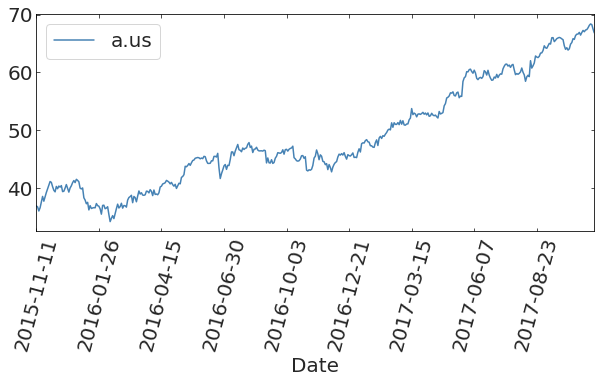

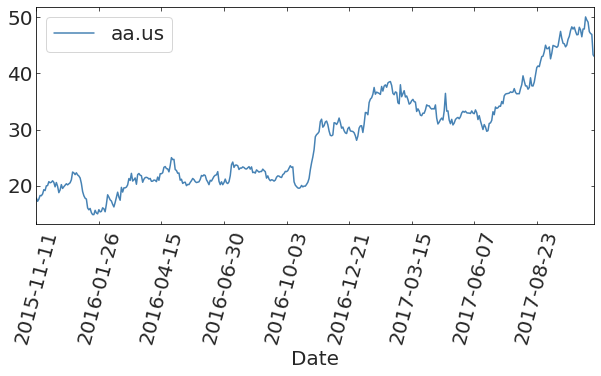

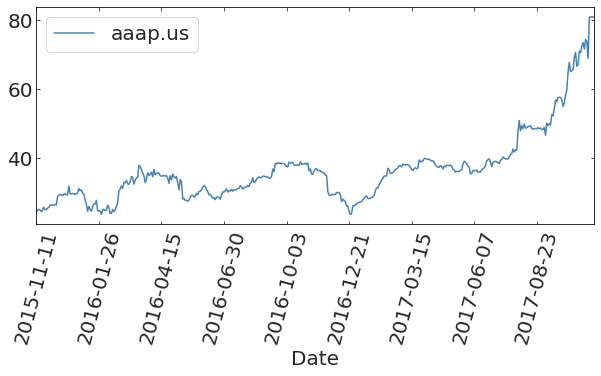

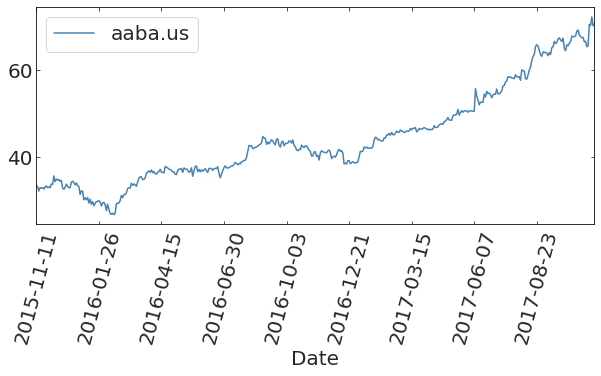

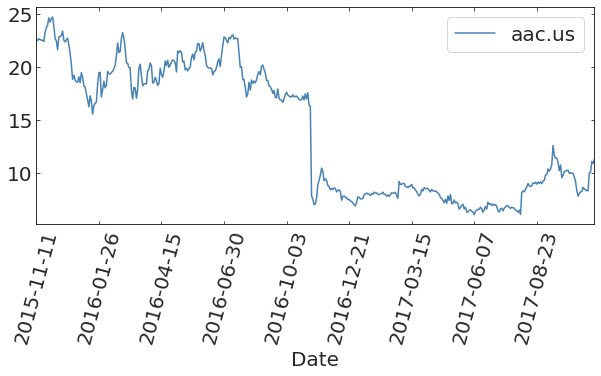

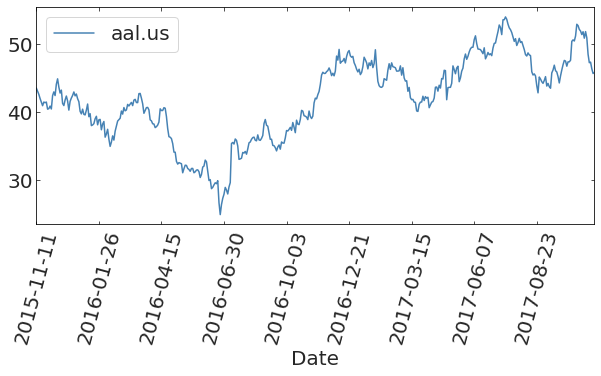

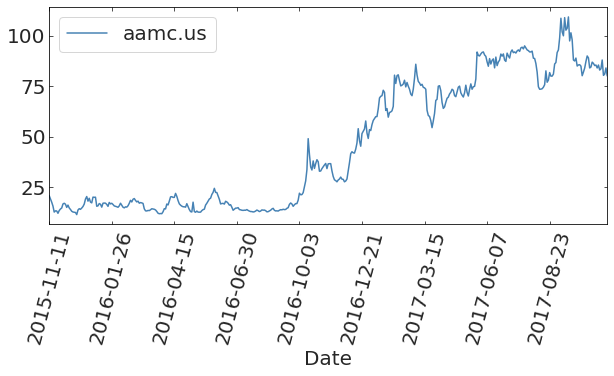

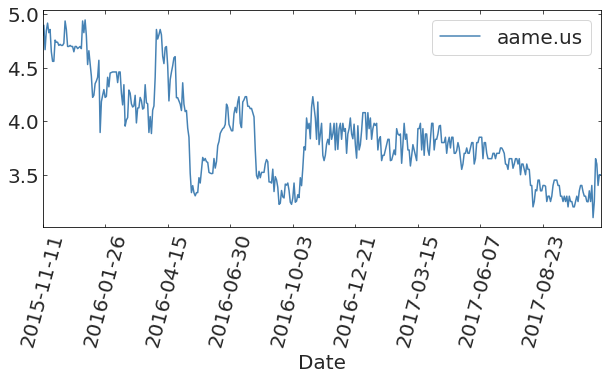

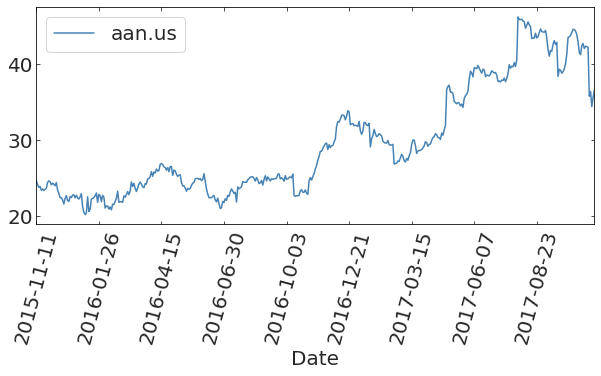

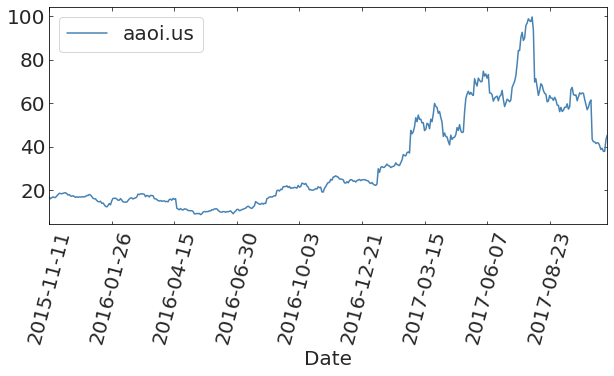

In [0]:
for c in tss.columns:
  fig,ax=pl.subplots(figsize=(10,4))
  tss.plot(y=c,ax=ax,rot=75)

tss.shape

## visualizing correlations

use ```pandas.plotting.scatter_matrix```  to look at the relationship between lightcurves

plot the pairwise correlation as a heatmap using ```pl.imshow()```. You can access the pairwise correlation with the dataframe method ```df.corr()```

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f91cd484ac8>,
      dtype=object)

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


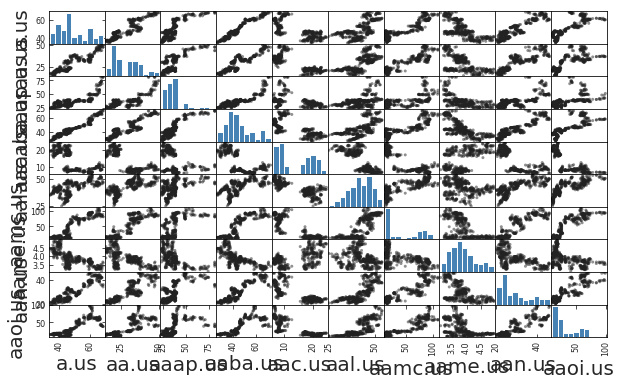

In [0]:
from pandas.plotting import scatter_matrix

scatter_matrix(tss,color="#222222")


In [0]:
tss.corr()

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
a.us,1.000000,0.902139,0.800310,0.973457,-0.721867,0.621041,0.897263,-0.699609,0.905395,0.851239
aa.us,0.902139,1.000000,0.776600,0.904210,-0.791137,0.713229,0.893952,-0.606774,0.873520,0.766459
aaap.us,0.800310,0.776600,1.000000,0.872134,-0.423021,0.451520,0.621329,-0.573976,0.696179,0.560427
aaba.us,0.973457,0.904210,0.872134,1.000000,-0.670578,0.612989,0.849972,-0.709023,0.903785,0.809059
aac.us,-0.721867,-0.791137,-0.423021,-0.670578,1.000000,-0.785248,-0.868936,0.510986,-0.765267,-0.780147
aal.us,0.621041,0.713229,0.451520,0.612989,-0.785248,1.000000,0.780517,-0.219258,0.756808,0.746505
aamc.us,0.897263,0.893952,0.621329,0.849972,-0.868936,0.780517,1.000000,-0.544740,0.881631,0.904166
aame.us,-0.699609,-0.606774,-0.573976,-0.709023,0.510986,-0.219258,-0.544740,1.000000,-0.585002,-0.496371
aan.us,0.905395,0.873520,0.696179,0.903785,-0.765267,0.756808,0.881631,-0.585002,1.000000,0.860847
aaoi.us,0.851239,0.766459,0.560427,0.809059,-0.780147,0.746505,0.904166,-0.496371,0.860847,1.000000


([<matplotlib.axis.YTick at 0x7f91c739c3c8>,
 <a list of 10 Text yticklabel objects>)

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


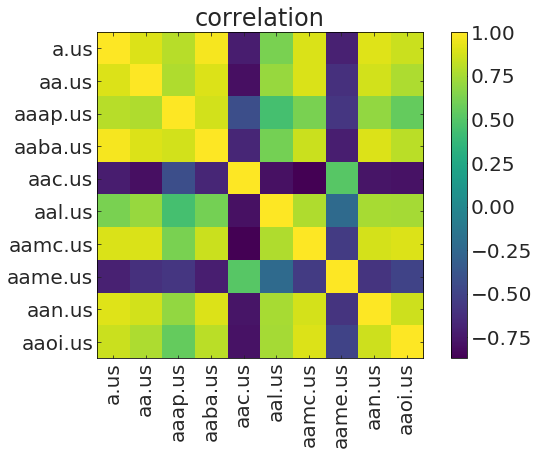

In [0]:
pl.imshow(tss.corr())
pl.colorbar()
pl.title("correlation")
pl.xticks(range(len(tss.columns)),tss.columns,rotation=90)
pl.yticks(range(len(tss.columns)),tss.columns)

## testing for stationarity
test if each of these time series is stationary using the AD fuller test using ```statsmodels.api.tsa.stattools.adfuller()```

```for f in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])```

Have the code automatically print a statement about wheather the ts is stationary for each ts (for example in a for loop).

In [0]:
import statsmodels.api as sm

In [0]:
threshold = 0.05
for c in tss.columns[:2]:
    print(c, "is stationary:", sm.tsa.stattools.adfuller(tss[c])[1] < threshold)


a.us is stationary: False
aa.us is stationary: False


## measure autocorrelation

plot the time series and its autocorrelation and partial autocorrelation function in blue if it is not stationary, in red if it is stationary

In [0]:
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

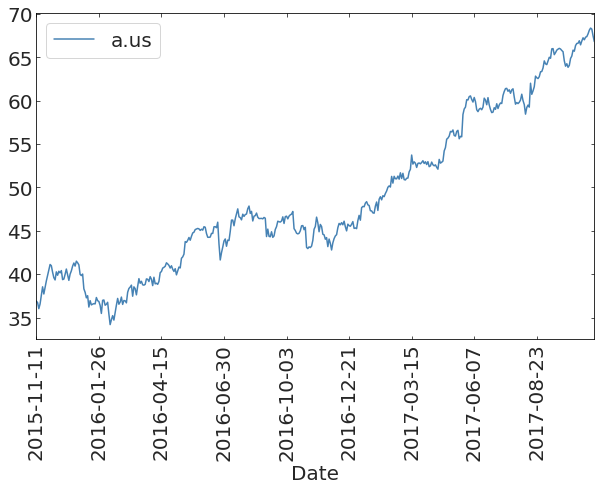

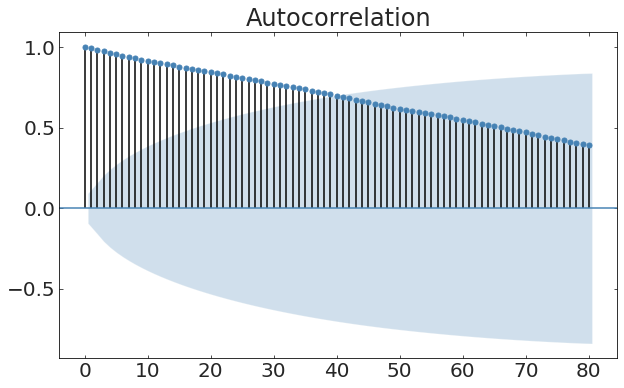

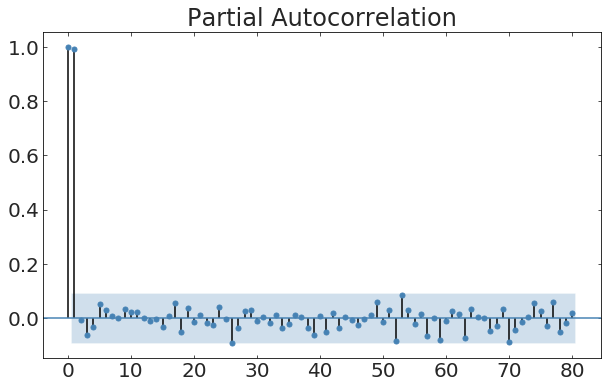

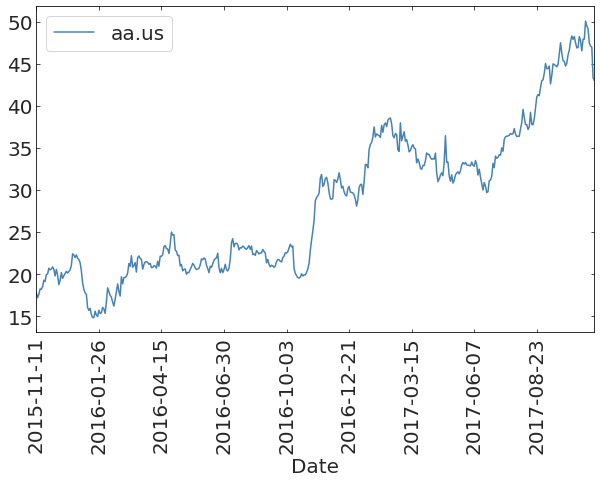

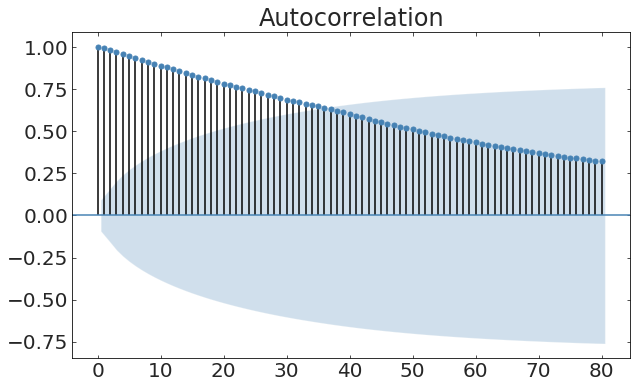

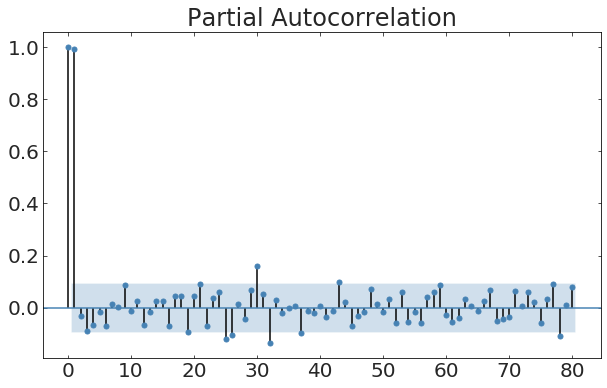

In [0]:
ax = tss.plot(y="a.us",rot=90)
fig=sm.graphics.tsa.plot_acf(tss[['a.us']],lags=80,title="Autocorrelation")
fig=sm.graphics.tsa.plot_pacf(tss[['a.us']],lags=80,title="Partial Autocorrelation")

ax = tss.plot(y="aa.us",rot=90)
fig=sm.graphics.tsa.plot_acf(tss[['aa.us']],lags=80,title="Autocorrelation")
fig=sm.graphics.tsa.plot_pacf(tss[['aa.us']],lags=80,title="Partial Autocorrelation")

# Fit one of the stationary time series with ARMA

To fit the model to the data use ```statsmodels.api.tsa.ARMA```

Inspect the function call as ```statsmodels.api.tsa.ARMA?```

The statsmodels models are generally fit into 2 phases: generating the model ```sm.tsa.ARMA(data, parameters)```, and then fitting it ```sm.tsa.ARMA(data, parameters).fit()```. 

For at least one model look at the model summary ```mod.summary()``` What are the best fit parameters based on this printed summary and thewir uncertainties? What is the value of the AIC(Aikiki Information Criterion)

See https://github.com/fedhere/A-Data-Driven-Evaluation-of-Delays-in-Criminal-Prosecution/blob/master/CodeExamples/ARMA/testingARMA_ARIMA.ipynb

## 1 Fit the model for a variety of parameters. You can run a nested loop to iterate over a range of p and q parameters
## 2. record the aic score for each fit
## 3. Find the best parameters to fit this time series with the AIC minimization criterion. For each model, after you fit it to the data, you can get the value of the AIC as ```model.aic```

In [0]:
#example of model output
mod = sm.tsa.ARMA(tss[['a.us']], (1,1)).fit()
#(tss[c], (3,1), dates=tss["Date"], ).fit()
#mod.plot_predict(dynamic=True, plot_insample=False)
mod.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: ignored

In [0]:
aics_st = np.zeros((5,5))
for p in range(5):
    for q in range(5):
          try:
            mod=sm.tsa.ARIMA(tss[['a.us']],(p,1,q)).fit()
            aics_st[p][q]=mod.aic
          except:
            aics_st[p][q]=np.nan
print("best parameters: ", np.where(aics_st == np.nanmin(aics_st)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

best parameters:  (array([2]), array([1]))


## 4. predict the in-set and the future alues

you can use ```mod.plot_predict()``` to visualize them

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


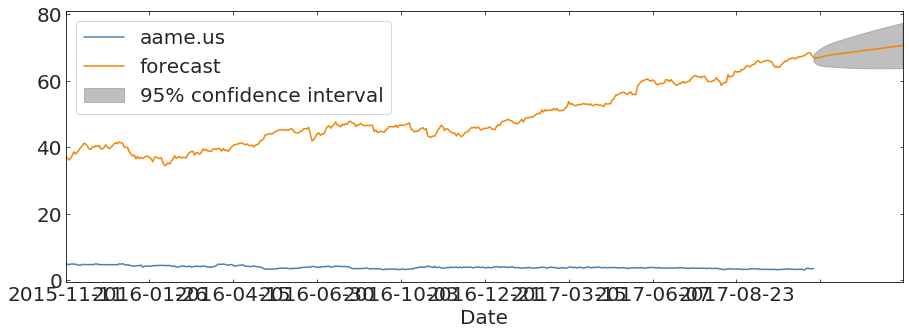

In [0]:
ax = tss[['aame.us']].plot(figsize=(15,5))
mod.plot_predict(end=500, plot_insample=False, ax=ax);

# 3.5 what are the coefficients of the best fit model? what do they mean? 


#  choose 2 non stationary time series in the set that are not correlated and repeat steps 3.1-3.4 with the ARIMA model

choose a value of the integration order that is reasonable ...

In [0]:
#choose 2 non stationary time series from the 10 sets
threshold = 0.05
for c in tss.columns[:10]:
    print(c, "is stationary:", sm.tsa.stattools.adfuller(tss[c])[1] < threshold)


a.us is stationary: False
aa.us is stationary: False
aaap.us is stationary: False
aaba.us is stationary: False
aac.us is stationary: False
aal.us is stationary: False
aamc.us is stationary: False
aame.us is stationary: True
aan.us is stationary: False
aaoi.us is stationary: False


In [0]:
#example of model output "aa.us"
mod = sm.tsa.ARMA(tss[['aa.us']], (1,1)).fit()
mod.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  aa.us   No. Observations:                  447
Model:                     ARMA(1, 1)   Log Likelihood                -542.951
Method:                       css-mle   S.D. of innovations              0.811
Date:                Wed, 26 Feb 2020   AIC                           1093.902
Time:                        22:40:06   BIC                           1110.312
Sample:                             0   HQIC                          1100.372
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          29.6184      8.311      3.564      0.000      13.328      45.908
ar.L1.aa.us     0.9971      0.003    328.989      0.000       0.991       1.003
ma.L1.aa.us     0.0067      0.049      0.136      0.892      -0.090       0.103
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0029           +0.0000j            1.0029            0.0000
MA.1         -149.8855           +0.0000j          149.8855            0.5000
-----------------------------------------------------------------------------
"""

In [0]:
#example of model "aal.us"
mod = sm.tsa.ARMA(tss[['aal.us']], (1,1)).fit()
mod.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 aal.us   No. Observations:                  447
Model:                     ARMA(1, 1)   Log Likelihood                -597.804
Method:                       css-mle   S.D. of innovations              0.918
Date:                Wed, 26 Feb 2020   AIC                           1203.608
Time:                        23:09:02   BIC                           1220.018
Sample:                             0   HQIC                          1210.078
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.6196      2.868     14.859      0.000      36.998      48.241
ar.L1.aal.us     0.9866      0.007    142.834      0.000       0.973       1.000
ma.L1.aal.us     0.0182      0.050      0.361      0.718      -0.081       0.117
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0136           +0.0000j            1.0136            0.0000
MA.1          -54.8491           +0.0000j           54.8491            0.5000
-----------------------------------------------------------------------------
"""

In [0]:
#choose the best ARIMA parameter for "aa.us"
aics_staa = np.zeros((5,5))
for p in range(5):
    for q in range(5):
          try:
            mod=sm.tsa.ARIMA(tss[['aa.us']],(p,1,q)).fit()
            aics_staa[p][q]=mod.aic
          except:
            aics_staa[p][q]=np.nan
print("best parameters: ", np.where(aics_staa == np.nanmin(aics_staa)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

best parameters:  (array([0]), array([3]))


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [0]:
#choose the best ARIMA parameter for "aal.us"
aics_stal = np.zeros((5,5))
for p in range(5):
    for q in range(5):
          try:
            mod=sm.tsa.ARIMA(tss[['aal.us']],(p,1,q)).fit()
            aics_stal[p][q]=mod.aic
          except:
            aics_stal[p][q]=np.nan
print("best parameters: ", np.where(aics_stal == np.nanmin(aics_stal)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

best parameters:  (array([0]), array([0]))


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overf

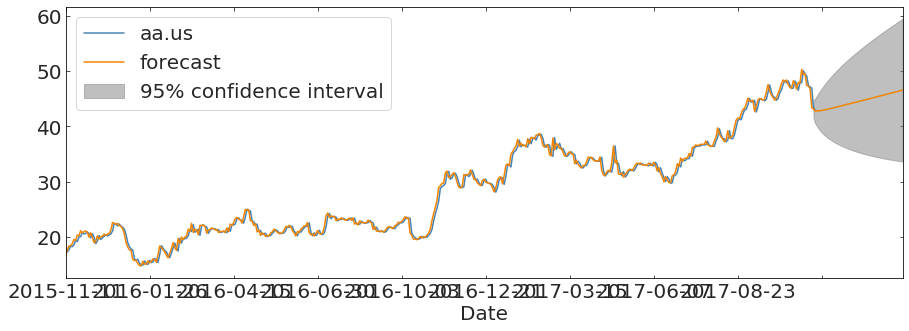

In [0]:
ax = tss[['aa.us']].plot(figsize=(15,5))
mod = sm.tsa.ARIMA(tss[['aa.us']], (np.where(aics_staa[0] == np.nanmin(aics_staa[0]))[0][0], 2,  
                                    np.where(aics_staa[0] == np.nanmin(aics_staa[0]))[0][0])).fit()    
mod.plot_predict(end=500, plot_insample=False, ax=ax);


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


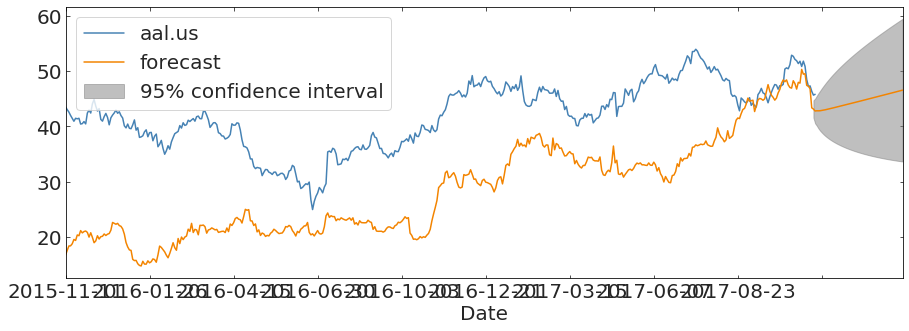

In [0]:
ax = tss[['aal.us']].plot(figsize=(15,5))
#mod = sm.tsa.ARIMA(tss[['aal.us']], (np.where(aics_stal[0] == np.nanmin(aics_stal[0]))[0][0], 2,  
#                                     np.where(aics_stal[0] == np.nanmin(aics_stal[0]))[0][0])).fit() 
mod.plot_predict(end=500, plot_insample=False, ax=ax);

# Redo the fit to one of the non-stsationary lightcurves with a different order of integration and compare the results. What do the coefficients tell you?

In [0]:
#choose the best ARIMA parameter for "aa.us"
aics_staa2 = np.zeros((5,5))
for q in range(5):
    for p in range(5):
          try:
            mod=sm.tsa.ARIMA(tss[['aa.us']],(p,1,q)).fit()
            aics_staa2[p][q]=mod.aic
          except:
            aics_staa2[p][q]=np.nan
print("best parameters: ", np.where(aics_staa2 == np.nanmin(aics_staa2)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

best parameters:  (array([0]), array([3]))


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

In [0]:
#example of model "aa.us"
mod = sm.tsa.ARMA(tss[['aa.us']], (2,1)).fit()
mod.summary()


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  aa.us   No. Observations:                  447
Model:                     ARMA(2, 1)   Log Likelihood                -541.611
Method:                       css-mle   S.D. of innovations              0.808
Date:                Thu, 27 Feb 2020   AIC                           1093.222
Time:                        03:41:59   BIC                           1113.735
Sample:                             0   HQIC                          1101.310
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          29.6171      8.224      3.601      0.000      13.499      45.735
ar.L1.aa.us     0.1887      0.190      0.991      0.322      -0.184       0.562
ar.L2.aa.us     0.8058      0.190      4.241      0.000       0.433       1.178
ma.L1.aa.us     0.8542      0.168      5.079      0.000       0.525       1.184
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0030           +0.0000j            1.0030            0.0000
AR.2           -1.2373           +0.0000j            1.2373            0.5000
MA.1           -1.1707           +0.0000j            1.1707            0.5000
-----------------------------------------------------------------------------
"""

# After changing the order of integration, I find out there is a highest goodness of fit (AIC) score and then the score decreases, which mean the higest score is the best fitted model among all the differernt intergration 